In [2]:
#import libraries
import os
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import math as m
import xlrd
from scipy import stats
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf

In [3]:
path = os.getcwd()

In [4]:
itrain = pd.read_excel(path + '/ANN_Churn_Prediction.xlsx')

In [5]:
print("shape of the train data:\n", itrain.shape)
print("Null-values column wise:\n", itrain.isnull().sum())

shape of the train data:
 (10000, 14)
Null-values column wise:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [6]:
display('head of train data:\n', itrain.head())
display('descriptive stats of numeric variables:\n', itrain.describe())

'head of train data:\n'

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


'descriptive stats of numeric variables:\n'

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
print("shape of the train data:\n", itrain.shape)
itrain.apply(lambda x: (len(x.unique()), [x.unique()]))

shape of the train data:
 (10000, 14)


RowNumber          (10000, [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1...
CustomerId         (10000, [[15634602, 15647311, 15619304, 157013...
Surname            (2932, [[Hargrave, Hill, Onio, Boni, Mitchell,...
CreditScore        (460, [[619, 608, 502, 699, 850, 645, 822, 376...
Geography                            (3, [[France, Spain, Germany]])
Gender                                         (2, [[Female, Male]])
Age                (70, [[42, 41, 39, 43, 44, 50, 29, 27, 31, 24,...
Tenure                    (11, [[2, 1, 8, 7, 4, 6, 3, 10, 5, 9, 0]])
Balance            (6382, [[0.0, 83807.86, 159660.8, 125510.82, 1...
NumOfProducts                                    (4, [[1, 3, 2, 4]])
HasCrCard                                              (2, [[1, 0]])
IsActiveMember                                         (2, [[1, 0]])
EstimatedSalary    (9999, [[101348.88, 112542.58, 113931.57, 9382...
Exited                                                 (2, [[1, 0]])
dtype: object

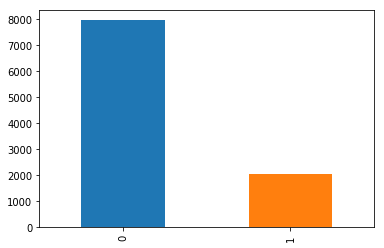

In [8]:
itrain['Exited'].value_counts().plot.bar()

In [9]:
cat_col = ['Surname','Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
num_col = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
num_df = itrain[num_col]
cat_df = itrain[cat_col]

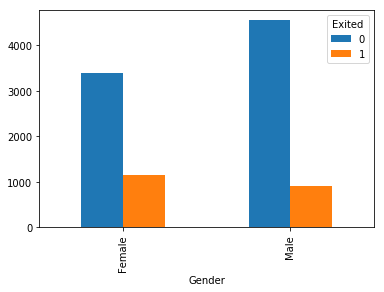

In [10]:
pd.pivot_table(itrain, index='Gender',values='CustomerId',columns='Exited',aggfunc='count').plot.bar()

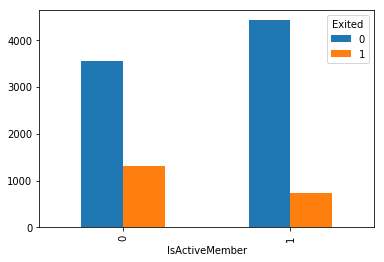

In [11]:
pd.pivot_table(itrain,index='IsActiveMember',values='CustomerId',columns='Exited',aggfunc='count').plot.bar()

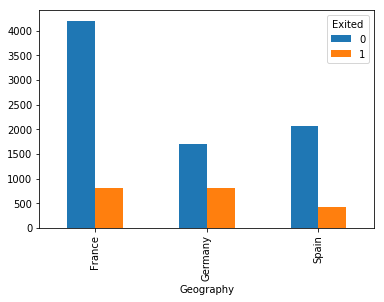

In [12]:
pd.pivot_table(itrain, index='Geography',values='CustomerId',columns='Exited',aggfunc='count').plot.bar()

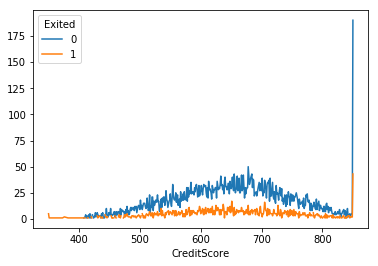

In [13]:
pd.pivot_table(itrain, index='CreditScore',values='CustomerId',columns='Exited',aggfunc='count').plot()

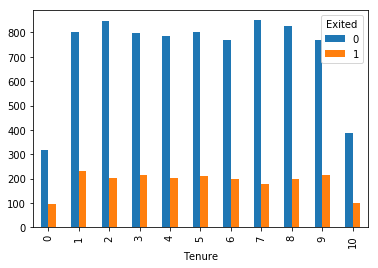

In [14]:
pd.pivot_table(itrain, index='Tenure',values='CustomerId',columns='Exited',aggfunc='count').plot.bar()

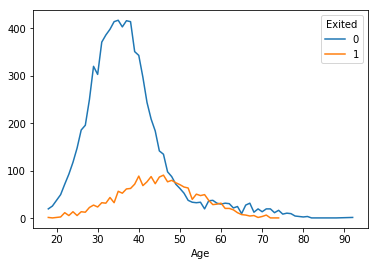

In [15]:
pd.pivot_table(itrain, index='Age',values='CustomerId',columns='Exited',aggfunc='count').plot()

In [16]:
pd.pivot_table(itrain, index=['Balance'], values='CustomerId',columns='Exited',aggfunc=[len], margins = True).head()

len             
Exited         0      1   All
Balance                      
0.00      3117.0  500.0  3617
3768.69      NaN    1.0     1
12459.19     NaN    1.0     1
14262.80     1.0    NaN     1
16893.59     1.0    NaN     1

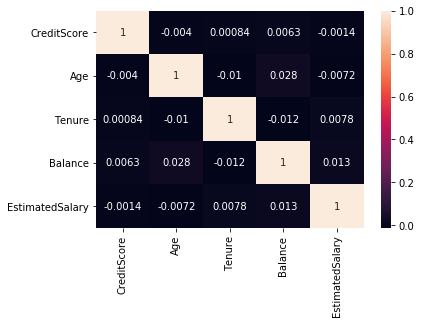

In [17]:
sns.heatmap(num_df.corr(), annot = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f779da9d6d8>,
      dtype=object)

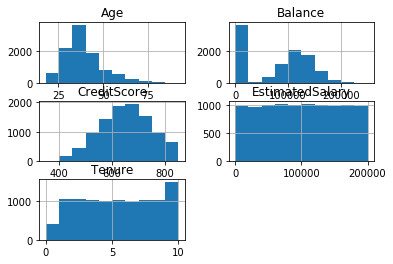

In [18]:
num_df.hist()

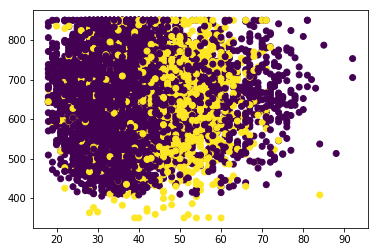

In [19]:
plt.scatter(x = 'Age', y = 'CreditScore', c = 'Exited', data = itrain)

([<matplotlib.axis.XTick at 0x7f779b731438>,
 <a list of 4 Text xticklabel objects>)

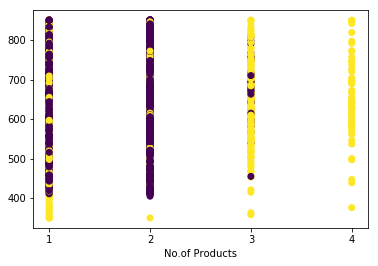

In [20]:
plt.scatter(x = 'NumOfProducts', y = 'CreditScore', c = 'Exited', data = itrain)
plt.xlabel('No.of Products')
plt.xticks([1, 2, 3, 4])

Text(0.5,0,'No.of Products')

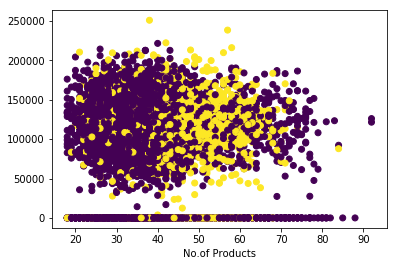

In [21]:
plt.scatter(x = 'Age', y = 'Balance', c = 'Exited', data = itrain)
plt.xlabel('No.of Products')

In [22]:
train_dummy = pd.get_dummies(columns = ['Geography', 'Gender'], data = itrain)

In [23]:
train_dummy.shape

(10000, 17)

In [24]:
predictors = train_dummy.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis = 1)
target = itrain['Exited']

In [25]:
itrain.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pred1 = scaler.fit_transform(predictors)

In [27]:
pred1

array([[-0.32622142,  0.29351742, -1.04175968, ..., -0.57380915,
         1.09598752, -1.09598752],
       [-0.44003595,  0.19816383, -1.38753759, ...,  1.74273971,
         1.09598752, -1.09598752],
       [-1.53679418,  0.29351742,  1.03290776, ..., -0.57380915,
         1.09598752, -1.09598752],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -0.57380915,
         1.09598752, -1.09598752],
       [ 1.25683526,  0.29351742, -0.69598177, ..., -0.57380915,
        -0.91241915,  0.91241915],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -0.57380915,
         1.09598752, -1.09598752]])

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pred1, target, test_size=0.3, 
                                                    random_state = 24)

In [139]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
# fix random seed for reproducibility
np.random.seed(7)

# create model
model = Sequential()
model.add(Dense(12, input_dim = X_train.shape[1] , activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['acc'])
# Fit the model
model.fit(X_train, y_train, epochs = 20, batch_size = 1, verbose = 2, class_weight = {0:0.3, 1:0.7})
# evaluate the model

Epoch 1/20
 - 16s - loss: 0.2150 - acc: 0.7649
Epoch 2/20
 - 17s - loss: 0.1865 - acc: 0.8101
Epoch 3/20
 - 17s - loss: 0.1769 - acc: 0.8236
Epoch 4/20
 - 16s - loss: 0.1737 - acc: 0.8284
Epoch 5/20
 - 16s - loss: 0.1723 - acc: 0.8279
Epoch 6/20
 - 18s - loss: 0.1713 - acc: 0.8284
Epoch 7/20
 - 16s - loss: 0.1704 - acc: 0.8314
Epoch 8/20
 - 16s - loss: 0.1700 - acc: 0.8283
Epoch 9/20
 - 15s - loss: 0.1695 - acc: 0.8323
Epoch 10/20
 - 15s - loss: 0.1692 - acc: 0.8277
Epoch 11/20
 - 14s - loss: 0.1692 - acc: 0.8271
Epoch 12/20
 - 14s - loss: 0.1686 - acc: 0.8323
Epoch 13/20
 - 12s - loss: 0.1685 - acc: 0.8327
Epoch 14/20
 - 12s - loss: 0.1685 - acc: 0.8296
Epoch 15/20
 - 13s - loss: 0.1684 - acc: 0.8316
Epoch 16/20
 - 14s - loss: 0.1677 - acc: 0.8321
Epoch 17/20
 - 14s - loss: 0.1678 - acc: 0.8327
Epoch 18/20
 - 14s - loss: 0.1674 - acc: 0.8277
Epoch 19/20
 - 16s - loss: 0.1670 - acc: 0.8341
Epoch 20/20
 - 21s - loss: 0.1670 - acc: 0.8323


In [137]:
pred = model.predict_classes(X_test)
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

3000/3000 [==============================] - 0s 59us/step

acc: 83.37%


In [138]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = [round(x[0]) for x in pred]
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

             precision    recall  f1-score   support

          0       0.88      0.91      0.89      2333
          1       0.64      0.58      0.61       667

avg / total       0.83      0.83      0.83      3000

[[2113  220]
 [ 279  388]]


In [32]:
print(pred)
#y_pred = [round(x[0]) for x in y_pred]

[[1]
 [0]
 [1]
 ...
 [1]
 [0]
 [1]]


### Functions 

In [33]:
## We Use Helper function of Sigmoid function to predict the output.
### Define the Sigmoid function using Numpy functions.

def sigmoid_function(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size -- only np.array not list

    Return:
    s -- sigmoid(z)
    """
    s = 1 / (1 + np.exp(-z))
    return s

In [147]:
sigmoid_function(13.97)

0.9999991431481955

## Simple perceptron Model

### activating neuron
** activation = sum(weight_i * x_i)+bias **

### weight update
** w = w + learning_rate * (expected - predicted)*x **

In [76]:
# Make a prediction with the given weights

def predict(row, weights):
    activation = weights[0]
    for i in range(len(train)-1):
        activation += weights[i + 1] * row[i]
        return 1.0 if activation >= 0.0 else 0.0

In [116]:
# Loop over each epoch:
#      Loop over each row in the training data for an epoch:
#            Loop over each weight and update it for a row in an epoch:


# Estimate Perceptron weights using stochastic gradient descent

def optimize_weights(train, l_rate, n_epoch):

    weights = [0.0 for i in range(len(train[0]))] # initialize the weights as zero for all samples
    
    for epoch in range(n_epoch):
        sum_error = 0.0
        
        for row in train: # iterating over each row, predicting and calculating Sigma Error 
            prediction = predict(row, weights)
            error = row[-1] - prediction
            sum_error += error**2
            
            weights[0] = weights[0] + l_rate * error # updating the weight for Ist row
            
            for i in range(len(row)-1):  #iterating over the weights
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
                
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    return weights

In [117]:
# Perceptron Algorithm With Stochastic Gradient Descent

def perceptron(train, test, l_rate, n_epoch):
    predictions = list()
    
    optimized_weights = optimize_weights(train, l_rate, n_epoch)
    
    for row in test:   # for final preditions using optimizet weights 
        prediction = predict(row, optimized_weights)
        predictions.append(prediction)
    return(predictions)

In [118]:
y = np.array([y_train])
y.T

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [119]:
train = np.concatenate((X_train, y.T), axis=1)

In [127]:
y_pred = perceptron(X_train, X_test, 0.001, 22)

>epoch=0, lrate=0.001, error=7090.950
>epoch=1, lrate=0.001, error=7052.680
>epoch=2, lrate=0.001, error=7043.929
>epoch=3, lrate=0.001, error=7047.946
>epoch=4, lrate=0.001, error=7047.121
>epoch=5, lrate=0.001, error=7036.720
>epoch=6, lrate=0.001, error=7047.121
>epoch=7, lrate=0.001, error=7047.121
>epoch=8, lrate=0.001, error=7047.121
>epoch=9, lrate=0.001, error=7047.946
>epoch=10, lrate=0.001, error=7047.946
>epoch=11, lrate=0.001, error=7047.121
>epoch=12, lrate=0.001, error=7047.946
>epoch=13, lrate=0.001, error=7047.946
>epoch=14, lrate=0.001, error=7047.121
>epoch=15, lrate=0.001, error=7043.929
>epoch=16, lrate=0.001, error=7047.946
>epoch=17, lrate=0.001, error=7047.121
>epoch=18, lrate=0.001, error=7047.946
>epoch=19, lrate=0.001, error=7047.946
>epoch=20, lrate=0.001, error=7047.121
>epoch=21, lrate=0.001, error=7036.720


In [128]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

             precision    recall  f1-score   support

        0.0       1.00      0.80      0.89      3000
        1.0       0.00      0.00      0.00         0

avg / total       1.00      0.80      0.89      3000

[[2392  608]
 [   0    0]]


/opt/usr/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
